# REAL ESTATE - PRICE PREDICTOR


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()#gets to know about missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()
#count ignores null
#mean average
#std standard deviation
#25%  -> 25% of value lie below that value given in row

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
#for plotting histogram
#import matplotlib.pyplot as  plt
#housing.hist(bins=50,figsize=(20,15))

#  Train-Test Splitting

In [9]:
#for learing purpose
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)#to fix shuffled value or else each time permutation is run gives diff shuffled value
    shuffled = np.random.permutation(len(data))#shuffles all the data 
    test_set_size = int(len(data)*test_ratio)#test ratio to split train and test
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [10]:
train_set,test_set = split_train_test(housing,0.2)
print(f"Rows in Train set :{len(train_set)}\nRows in Test set : {len(test_set)}\n")

Rows in Train set :405
Rows in Test set : 101



In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size =0.2 ,random_state = 42)
print(f"Rows in Train set :{len(train_set)}\nRows in Test set : {len(test_set)}\n")

Rows in Train set :404
Rows in Test set : 102



In [12]:
#since in CHAS most of the value is 0 where count of 1 is 
#35 ma be a chance tha all the test set contains only 0 and 
#no set contains 1 may not train model properly 
# so stratified split is present
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2 ,random_state=42)
for train_index ,test_index in split.split(housing,housing["CHAS"]):#split based on CHAS column
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set['CHAS'].value_counts() 

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
strat_test_set['CHAS'].value_counts() #same ratio of 0 and 1s in both test and train

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
housing = strat_train_set.copy()

## Looking for correlations

In [16]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)#coefficient = 1 for medv if we increase one value other should increase then 1
#1 means strong positive correlation
#RM average number of rooms so if we increase rooms value also increases so positive corelation
#LSTAT lower status of population

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B26DD71B48>,
      dtype=object)

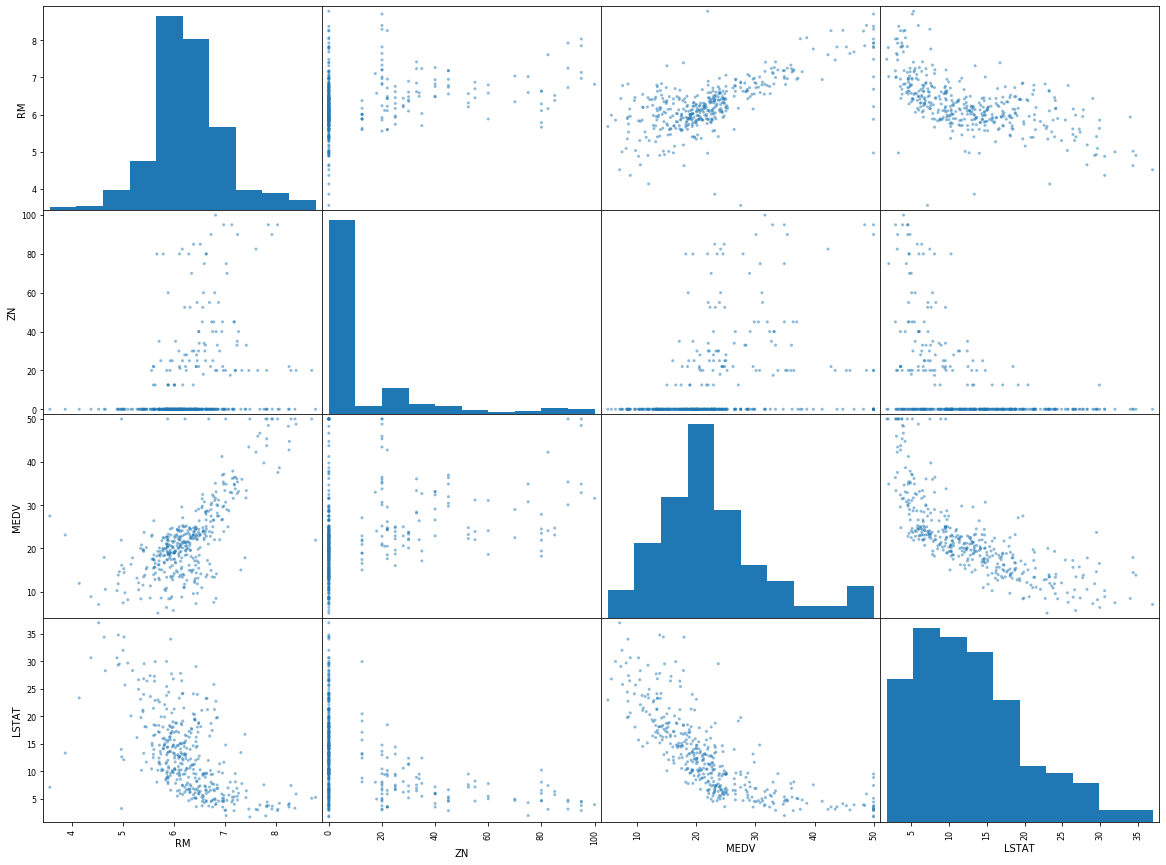

In [17]:
from pandas.plotting import scatter_matrix
attribute = ["RM","ZN","MEDV","LSTAT"]
scatter_matrix(housing[attribute],figsize=(20,15))

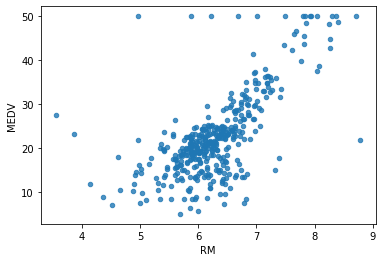

In [18]:
housing.plot(kind = "scatter",x= "RM" ,y ="MEDV",alpha = 0.8)#alpha size of data points
#by this can remove the outliers and train on only good dataset
#This shows that even 6 bed room and 9 bed rooms has same price may be cutoff or highest value is 50 


# Trying out attribute combinations

In [35]:
#housing['TAXRM'] = housing['TAX']/housing['RM']

In [36]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [37]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
# this makes a new taxrm which is negatively corelated

KeyError: 'MEDV'

In [38]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_label = strat_train_set["MEDV"].copy()

## Missing Attributes

In [39]:
#to take care of missing attributes , you have three options:
#1.get rid of missing data points -> cant be done when more points has null values
#2.get rid of whole attribute -> can do when correlation is less near by to 0
#set the value ot some value(0,mead,median)

In [40]:
a = housing.dropna(subset=["RM"])#option 1
a.shape

(404, 13)

In [41]:
a = housing.drop("RM",axis = 1)#option 2
#note that thre is no RM column and also note that the original housing datagframe will remain unchanged

In [42]:
median = housing['RM'].median()#option 3 computing median
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [43]:
#it may be possible that test may also contain null
#so should add the median got from the train test 
#but sklearn has some inbuilt called imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)#whichever the columns has the null values the fit median into the null values

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [44]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

## Scikit-Learn Design

Primarily , three types of objects
1. Estimators - It estimates some parameter EG. imputer
-> has fit method and tranform method
fit method - Fit the dataset and calculated the internal parameters

2. Transformers -> takes input and returns output based on the learnings from fit(). It has also has a convience function called fit_transform() which fits and then tranform.

3. Predictors -> LinearRegression model is an example of predictor fit() and predict()  are two comman functions . It also gives score function which will evalute the predictions.


## Feature Scaling

Primarily , two types of feature scalling methods:
1. MIN-MAX scaling(Normalisation)->  (value-min)/(max-min) will be same range 0 and 1 
sklearn provides a class called MinMaxScaler for this

2. Standardization -> (value-mean)/std
sklearn provides a class called Standard Scaler for this

## Creating Pipeline

In [45]:
from sklearn.pipeline import Pipeline
#some models will perform well when  trained on same range of values
#so used feature scaling
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('stc_scaler',StandardScaler())])
#can give as many as possible in pipeline


In [46]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [47]:
housing_num_tr.shape

(404, 13)

## Selecting  a desired model for Real Estates

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model = LinearRegression()
model = DecisionTreeRegressor()#error 0 overfit
model.fit(housing_num_tr,housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [55]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [56]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [57]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_label,housing_predictions)
line_rmse = np.sqrt(lin_mse)
lin_mse

0.0

## Using better evaluation technique - Cross Validation

In [59]:
# 1 2 3 4 5 6 7  cross validation is first trains on other than 1 dataset and test on 1
#similarly other than 2 train and test on 2 calculates all the error
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_label,scoring="neg_mean_squared_error",cv = 10)#cv means 10 fold
rmse_scores = np.sqrt(-scores)

In [60]:
rmse_scores #before use to be zero for decision tree after kfold gives some error


array([3.79164679, 5.65969921, 5.63858657, 3.53418842, 3.90518886,
       3.10616323, 6.64482882, 5.01375608, 3.21628668, 3.73021447])

In [61]:
def print_scores(scores):
    print("Score :" ,scores)
    print("mean :",scores.mean())
    print("Standard Deviation :",scores.std())

In [62]:
print_scores(rmse_scores)

Score : [3.79164679 5.65969921 5.63858657 3.53418842 3.90518886 3.10616323
 6.64482882 5.01375608 3.21628668 3.73021447]
mean : 4.424055911814869
Standard Deviation : 1.1584243488733923


In [63]:
#joblib to save and load model
from joblib import dump,load
dump(model,'real.joblib')

['real.joblib']